In [8]:
import numpy as np
import matplotlib.pyplot as plt

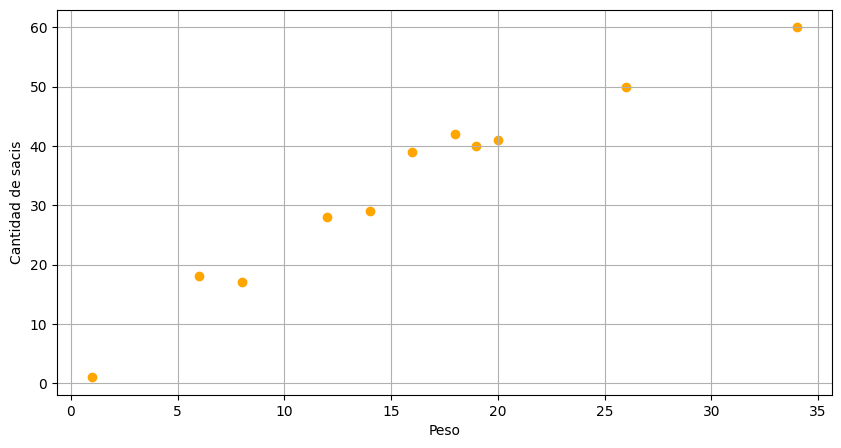

In [9]:
# Datos para la gráfica
plt.figure(figsize=(10, 5))
cantidad_naranjas = np.array([1, 6, 8, 12, 14, 16, 18, 19, 20, 26, 34])
peso_kg = np.array([1, 18, 17, 28, 29, 39, 42, 40, 41, 50, 60])


plt.scatter(cantidad_naranjas, peso_kg, c="orange")
plt.xlabel("Peso")
plt.ylabel("Cantidad de sacis")
plt.grid(True)

In [37]:
w = np.random.randn()
b = np.random.randn()

#Hyperparametros
learning_rate = 0.0001
epocas = 100

#Funciones de costo
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def train(w, b, y, x, cost_function):
    y_pred = w * x + b

    cost = cost_function(y, y_pred)

    dw = -2 * np.mean((y - y_pred) * x)
    db = -2 * np.mean((y - y_pred))

    w -= learning_rate * dw
    b -= learning_rate * db

    return w, b, cost

In [38]:
cost_history = []
param_history = [(w, b)]
cost_function = rmse

# Main loop
for i in range(epocas):
    w, b, cost = train(w, b, y=peso_kg, x=cantidad_naranjas, cost_function=cost_function)
    
    cost_history.append(cost)
    param_history.append((w, b))
    
    # Logs
    if i % (epocas / 10) == 0:
        print(f"Epoca {i+1}: Costo ({cost_function.__name__}): {cost}")
        

print(" Entrenamiento Completo ".center(45, "="))
print(f"Coeficiente w: {w}")
print(f"Coeficiente b: {b}")

Epoca 1: Costo (rmse): 29.868805397699422
Epoca 11: Costo (rmse): 15.532055358452324
Epoca 21: Costo (rmse): 8.638070923030085
Epoca 31: Costo (rmse): 5.65308017652343
Epoca 41: Costo (rmse): 4.586228094505422
Epoca 51: Costo (rmse): 4.2700798016056645
Epoca 61: Costo (rmse): 4.184893252272282
Epoca 71: Costo (rmse): 4.162386210046807
Epoca 81: Costo (rmse): 4.156184995570976
Epoca 91: Costo (rmse): 4.154176232249963
=========== Entrenamiento Completo ==========
Coeficiente w: 1.9735100308654026
Coeficiente b: 0.8553128643772644


Text(0.5, 1.0, 'Función de costo')

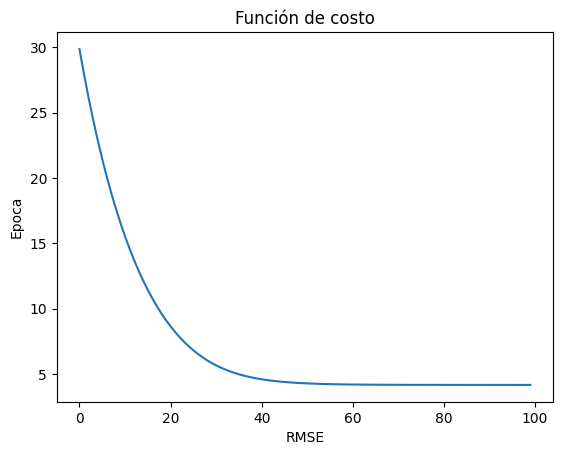

In [39]:
fig, ax = plt.subplots()

ax.plot(cost_history)
ax.set_xlabel("RMSE")
ax.set_ylabel("Epoca")
ax.set_title("Función de costo")

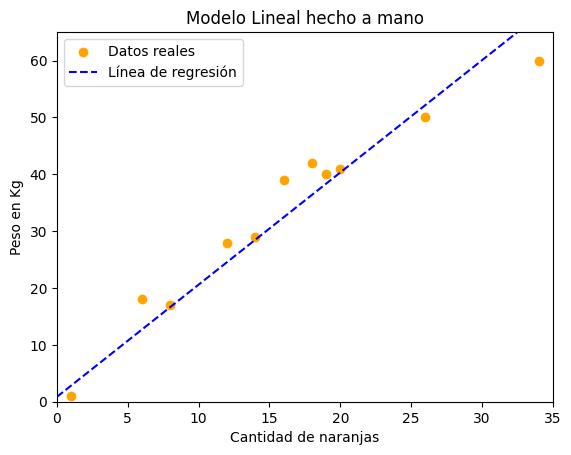

In [41]:
fig, ax = plt.subplots()
ax.scatter(cantidad_naranjas, peso_kg, color="orange", label="Datos reales")
line, = ax.plot(w*np.arange(cantidad_naranjas.max()) + b, color="b", linestyle="--", label="Línea de regresión")
ax.set_xlim(0, 35)
ax.set_ylim(0, 65)
ax.set_xlabel("Cantidad de naranjas")
ax.set_ylabel("Peso en Kg")
ax.set_title("Modelo Lineal hecho a mano")
plt.legend()
plt.show()

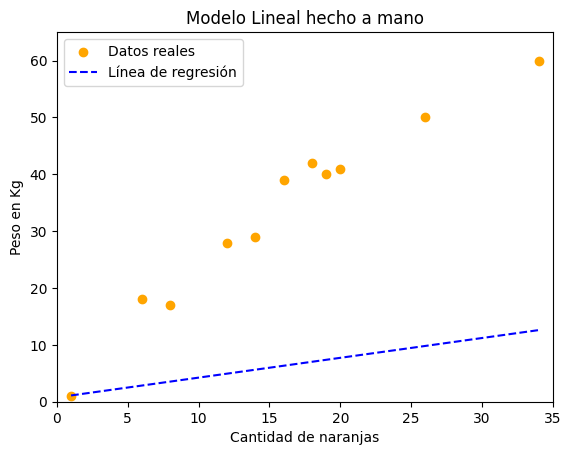

In [42]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.scatter(cantidad_naranjas, peso_kg, color="orange", label="Datos reales")
line, = ax.plot([], [], color="b", linestyle="--", label="Línea de regresión")
ax.set_xlim(0, 35)
ax.set_ylim(0, 65)
ax.set_xlabel("Cantidad de naranjas")
ax.set_ylabel("Peso en Kg")
ax.set_title("Modelo Lineal hecho a mano")
plt.legend()


def update(frame):
    w, b = param_history[frame]
    line.set_data(cantidad_naranjas, w*cantidad_naranjas + b)
    return line,


ani = animation.FuncAnimation(fig, update, frames=range(epocas), blit=True, repeat=True)
plt.show()

In [43]:
ani.save("Entrenamiento_manual.gif", writer="imagemagick", fps=5)

MovieWriter imagemagick unavailable; using Pillow instead.


Probar el modelo

In [44]:
naranjas = np.array([3, 9, 15, 23, 66])
 
y_pred = w * naranjas + b

y_pred

array([  6.77584296,  18.61690314,  30.45796333,  46.24604357,
       131.1069749 ])

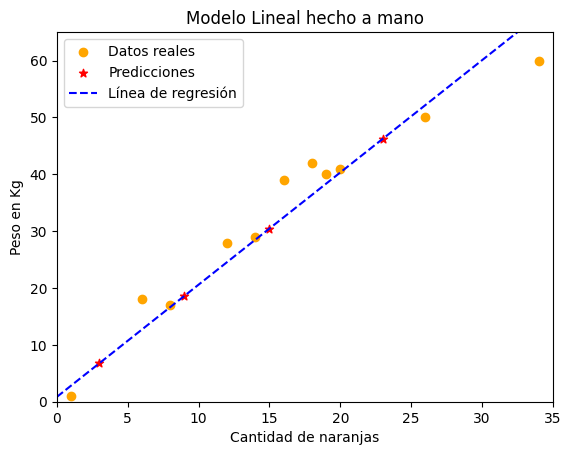

In [45]:
fig, ax = plt.subplots()
ax.scatter(cantidad_naranjas, peso_kg, color="orange", label="Datos reales")
ax.scatter(naranjas, y_pred, color="red", marker="*", label="Predicciones")
line, = ax.plot(w*np.arange(cantidad_naranjas.max()) + b, color="b", linestyle="--", label="Línea de regresión")
ax.set_xlim(0, 35)
ax.set_ylim(0, 65)
ax.set_xlabel("Cantidad de naranjas")
ax.set_ylabel("Peso en Kg")
ax.set_title("Modelo Lineal hecho a mano")
plt.legend()
plt.show()

Ahora hay un nuevo problema. Es necesario separar las naranjas para dos propositos: Exportación y venta al público.

Afortunadamente, en el registro anterior se contaba también con un listado de cada naranja con dos características "Peso en Kg" y "Diametro" y al final, el tipo de venta objetivo.

Al ser un problema simple podemos resolverlo con la fórmula que todos queremos y amamos:  y=mx+b+ϵ . Es decir, una línea que separe entre dos clases.

En regresión, el algoritmo busca el hyperplano que mejor describa la relación entre las características. En clasificación, busca el hyperplano que mejor separe los distintos grupos. MSE aún se puede utilizar en este tipo de modelos.

In [46]:
peso_kg = np.array([0.97139201, 1.03993152, 0.56046186, 0.55399498, 0.15903694,
                    0.69267216, 1.13212727, 0.56737579, 0.92918627, 0.89657559,
                    0.32033061, 0.32265443, 0.65294228, 0.19718177, 0.37858346,
                    0.2906537 , 1.02647474, 0.24923482, 0.83489815, 0.52712858])
diametro_naranjas = np.array([1.13578388,  1.37264604,  1.98391932,  2.11307948,  3.36244315, # Naranjas a locales
                              10.92727347, 11.1429517 , 12.03662147, 12.98922465, 13.29808143,
                              19.29529157, 22.3975563 , 27.73288153, 27.88545743, 28.39003535, # Naranjas a exportar
                              29.0316027 , 30.80554294, 32.0815516 , 33.47094039, 38.10958212])

In [47]:
destino = np.zeros_like(diametro_naranjas)
destino[len(destino)//2:] = 1
destino

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

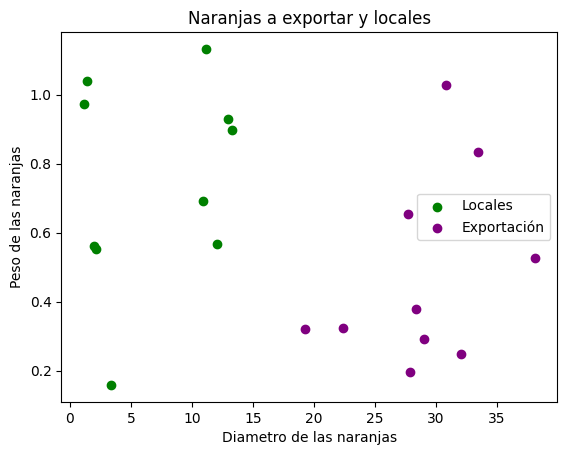

In [48]:
fig, ax = plt.subplots()
ax.scatter(y=peso_kg[destino==0], x=diametro_naranjas[destino==0], color="green", label="Locales")
ax.scatter(y=peso_kg[destino==1], x=diametro_naranjas[destino==1], color="purple", label="Exportación")
ax.set_xlabel("Diametro de las naranjas")
ax.set_ylabel("Peso de las naranjas")
ax.set_title("Naranjas a exportar y locales")
ax.legend()
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
modelo = LogisticRegression()
modelo.fit(np.column_stack([peso_kg, diametro_naranjas]), destino)

LogisticRegression()

In [51]:
# Predicciones
y_pred = modelo.predict(np.column_stack([peso_kg, diametro_naranjas]))

print(f"Exactitud: {accuracy_score(destino, y_pred)}")

Exactitud: 1.0


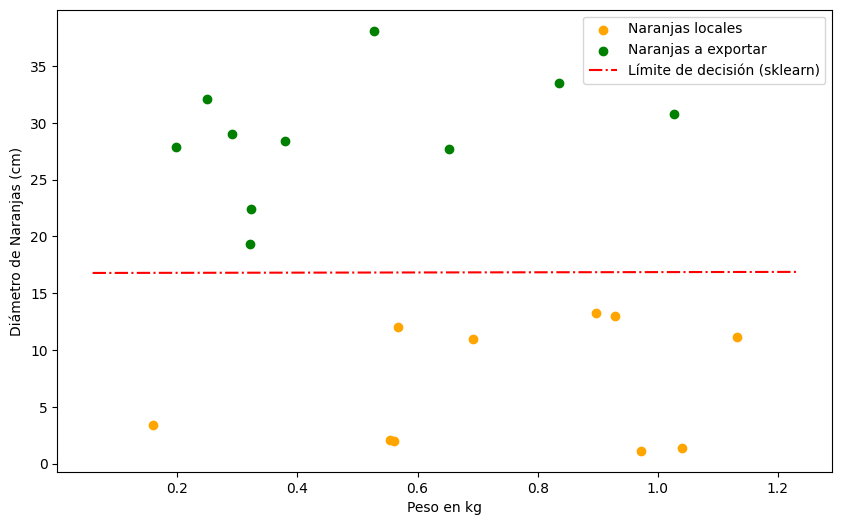

In [52]:
# Calcular línea de decisión
x_values = np.linspace(min(peso_kg) - 0.1, max(peso_kg) + 0.1, 100)
y_values = -(modelo.intercept_ + modelo.coef_[0][0] * x_values) / modelo.coef_[0][1]

# Gráfica de los datos y la línea de decisión
plt.figure(figsize=(10, 6))
plt.scatter(peso_kg[:len(destino)//2], diametro_naranjas[:len(destino)//2], color='orange', label='Naranjas locales')
plt.scatter(peso_kg[len(destino)//2:], diametro_naranjas[len(destino)//2:], color='green', label='Naranjas a exportar')
plt.plot(x_values, y_values, color='red', linestyle='-.', label='Límite de decisión (sklearn)')

# Etiquetas de los ejes
plt.xlabel('Peso en kg')
plt.ylabel('Diámetro de Naranjas (cm)')
plt.legend()

# Mostrar la gráfica
plt.show()

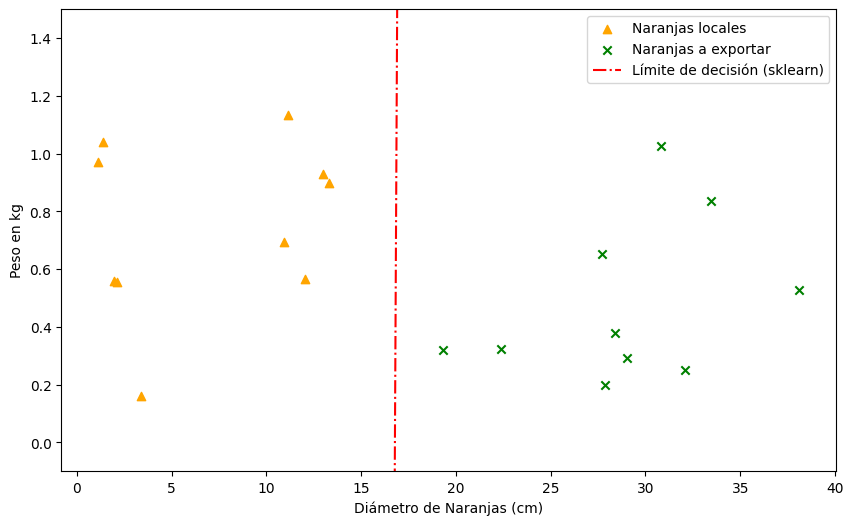

In [53]:
# Calcular línea de decisión
x_values = np.linspace(min(diametro_naranjas) - 0.1, max(diametro_naranjas) + 0.1, 100)
y_values = -(modelo.intercept_ + modelo.coef_[0][1] * x_values) / modelo.coef_[0][0]

# Gráfica de los datos y la línea de decisión
plt.figure(figsize=(10, 6))
plt.scatter(y=peso_kg[:len(destino)//2],
            x=diametro_naranjas[:len(destino)//2],
            color='orange',
            label='Naranjas locales',
            marker="^"
            )
plt.scatter(y=peso_kg[len(destino)//2:],
            x=diametro_naranjas[len(destino)//2:],
            color='green',
            label='Naranjas a exportar',
            marker="x"
            )
plt.plot(x_values, y_values, color='red', linestyle='-.', label='Límite de decisión (sklearn)')

# Etiquetas de los ejes
plt.xlabel('Diámetro de Naranjas (cm)')
plt.ylabel('Peso en kg')
plt.ylim([-0.1, 1.5])
plt.legend()

In [54]:
nuevas_diam = [10, 9, 55, 31]
nuevas_peso = [1, 1.5, 0.3, 2]

pred = modelo.predict(np.column_stack([nuevas_peso, nuevas_diam]))

pred

array([0., 0., 1., 1.])

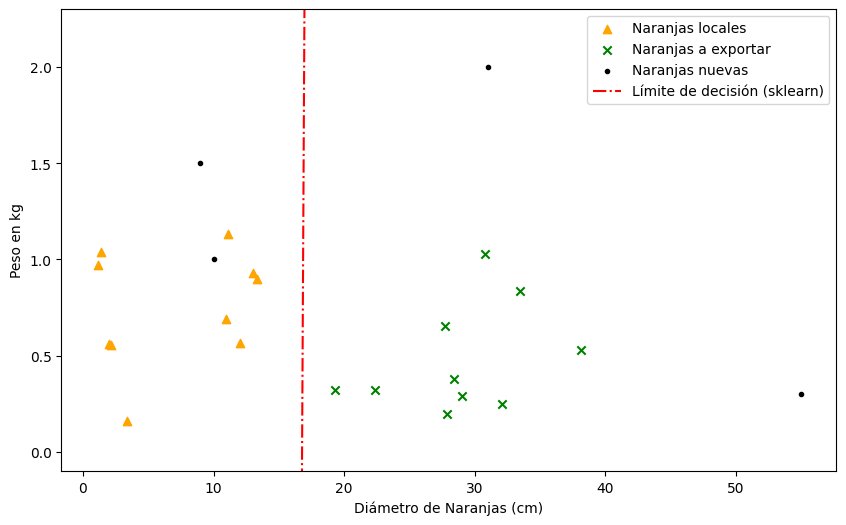

In [55]:
# Gráfica de los datos y la línea de decisión
plt.figure(figsize=(10, 6))
plt.scatter(y=peso_kg[:len(destino)//2],
            x=diametro_naranjas[:len(destino)//2],
            color='orange',
            label='Naranjas locales',
            marker="^"
            )
plt.scatter(y=peso_kg[len(destino)//2:],
            x=diametro_naranjas[len(destino)//2:],
            color='green',
            label='Naranjas a exportar',
            marker="x"
            )

plt.scatter(y=nuevas_peso, x=nuevas_diam, color="black", label="Naranjas nuevas", marker=".")

plt.plot(x_values, y_values, color='red', linestyle='-.', label='Límite de decisión (sklearn)')

# Etiquetas de los ejes
plt.xlabel('Diámetro de Naranjas (cm)')
plt.ylabel('Peso en kg')
plt.ylim([-0.1, 2.3])
plt.legend()